In [77]:
import pandas as pd
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [78]:
data = pd.read_csv(os.path.join(os.getcwd(),"pv_data", "pvdata.csv"), index_col="time")
data.index = pd.to_datetime(data.index, format="%Y%m%d:%H%M")

In [79]:
data.index

DatetimeIndex(['2021-01-01 00:10:00', '2021-01-01 01:10:00',
               '2021-01-01 02:10:00', '2021-01-01 03:10:00',
               '2021-01-01 04:10:00', '2021-01-01 05:10:00',
               '2021-01-01 06:10:00', '2021-01-01 07:10:00',
               '2021-01-01 08:10:00', '2021-01-01 09:10:00',
               ...
               '2021-12-31 14:10:00', '2021-12-31 15:10:00',
               '2021-12-31 16:10:00', '2021-12-31 17:10:00',
               '2021-12-31 18:10:00', '2021-12-31 19:10:00',
               '2021-12-31 20:10:00', '2021-12-31 21:10:00',
               '2021-12-31 22:10:00', '2021-12-31 23:10:00'],
              dtype='datetime64[ns]', name='time', length=8760, freq=None)

In [80]:
import datetime
start = datetime.datetime(year=2021, month=4, day=1, hour=5)
end = datetime.datetime(year=2021, month=4, day=1, hour=23)

mydata = data.loc[start:end]

In [81]:
mydata

,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,,
2021-04-01 05:10:00,0.00,0.00,0.00,0.00,0.00,4.05,3.13,0.0
2021-04-01 06:10:00,740.90,242.90,95.17,2.36,8.86,3.84,2.84,0.0
2021-04-01 07:10:00,1328.48,453.12,154.86,6.06,18.06,5.17,2.93,0.0
2021-04-01 08:10:00,1575.28,542.70,188.22,9.48,26.69,6.49,3.03,0.0
2021-04-01 09:10:00,1695.80,601.22,193.44,12.54,34.19,7.82,3.12,0.0
2021-04-01 10:10:00,1561.25,503.28,226.00,14.11,39.84,8.85,3.29,0.0
2021-04-01 11:10:00,1470.02,517.72,168.06,15.96,42.84,9.87,3.46,0.0
2021-04-01 12:10:00,1118.53,344.71,179.80,15.35,42.62,10.90,3.63,0.0
2021-04-01 13:10:00,719.35,195.34,159.51,13.99,39.22,11.25,3.54,0.0


<AxesSubplot:title={'center':'Generated '}, xlabel='Time', ylabel='Power [W]'>

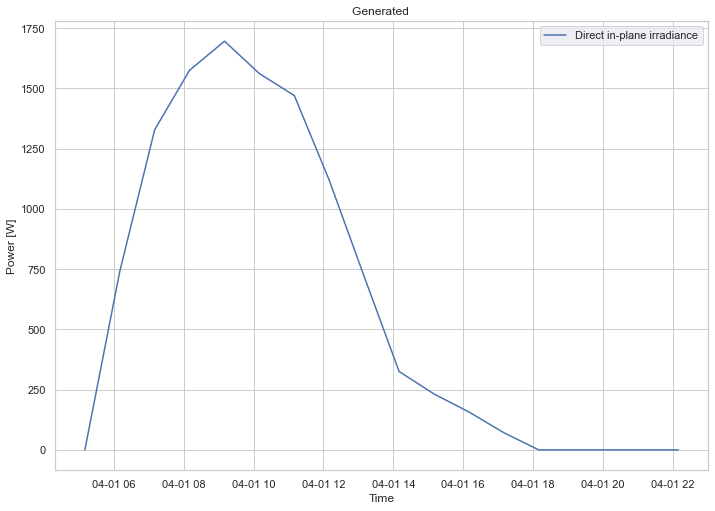

In [82]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlabel("Time") 
ax.set_ylabel("Power [W]")
ax.set_title("Generated ")
sns.lineplot(x="time", y="P", data=mydata, label="Direct in-plane irradiance", ax=ax)

<AxesSubplot:title={'center':'Generated '}, xlabel='Time', ylabel='Power [W]'>

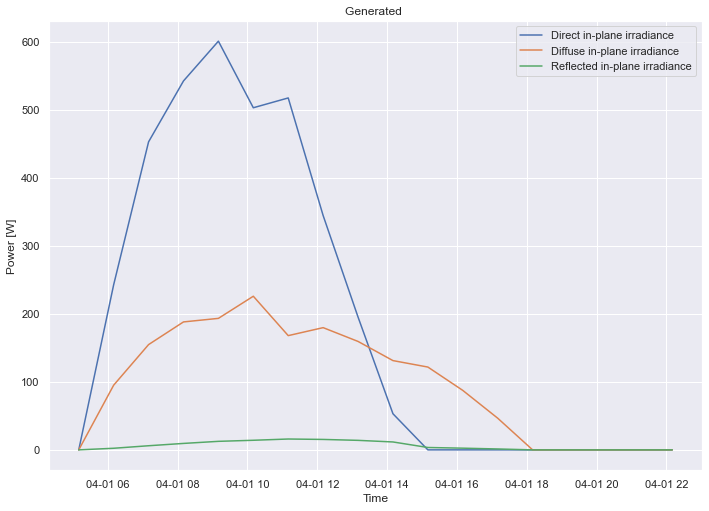

In [83]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlabel("Time") 
ax.set_ylabel("Power [W]")
ax.set_title("Generated ")
sns.lineplot(x="time", y="Gb(i)", data=mydata, label="Direct in-plane irradiance", ax=ax)
sns.lineplot(x="time", y="Gd(i)", data=mydata, label="Diffuse in-plane irradiance", ax=ax)
sns.lineplot(x="time", y="Gr(i)", data=mydata, label="Reflected in-plane irradiance", ax=ax)

<AxesSubplot:title={'center':'Generated '}, xlabel='Time', ylabel='Power [W]'>

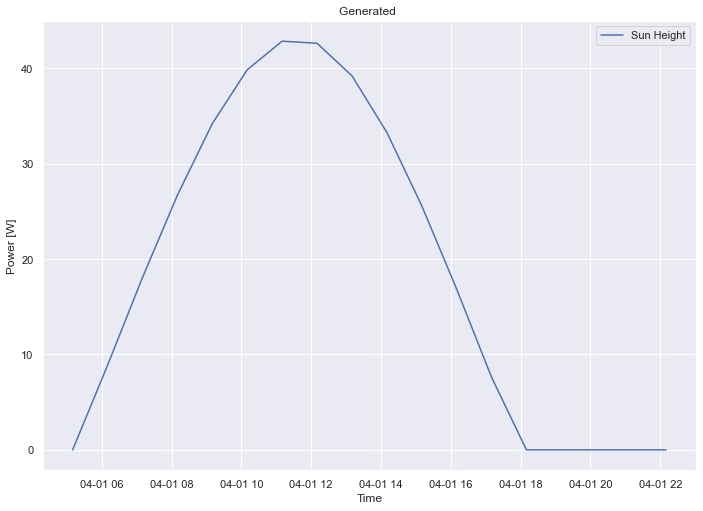

In [84]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlabel("Time") 
ax.set_ylabel("Power [W]")
ax.set_title("Generated ")
sns.lineplot(x="time", y="H_sun", data=mydata, label="Sun Height", ax=ax)

In [85]:
data_file = os.path.join(os.getcwd(), "output", "2021_04_01_08_Uhr.csv")

forecast_data = pd.read_csv(data_file, index_col="DATE")
forecast_data.index = pd.to_datetime(forecast_data.index)
start = datetime.datetime(year=2021, month=4, day=1, hour=5)
end = datetime.datetime(year=2021, month=4, day=1, hour=23)
forecast_data = forecast_data.loc[start:end]
#forecast_data.index = forecast_data.index - pd.offsets.YearOffset(5)
for column in forecast_data.columns:
    print(column)

WIND_DIRECTION
WIND_SPEED
CLOUD_COVER_TOTAL
PRESSURE_AIR_SURFACE_REDUCED
PROBABILITY_RADIATION_GLOBAL_LAST_1H
RADIATION_GLOBAL
TEMPERATURE_AIR_200
TEMPERATURE_DEW_POINT_200
WEATHER_SIGNIFICANT
TEMPERATURE_AIR_200DEGC
DEW_POINT_DEGC
RAD_WH
DHI_ERBS
DNI_DISC
DNI_DIRINDEX
GHI_CLEARSKY
DNI_CLEARSKY
DHI_CLEARSKY
AZIMUTH
ZENITH
ELEVATION
Ost_ac
Ost_aoi
Ost_cell_temperature
Ost_effective_irradiance
Ost_dc_i_sc
Ost_dc_v_oc
Ost_dc_i_mp
Ost_dc_v_mp
Ost_dc_p_mp
Ost_dc_i_x
Ost_dc_i_xx
Ost_diode_params_I_L
Ost_diode_params_I_o
Ost_diode_params_R_s
Ost_diode_params_R_sh
Ost_diode_params_nNsVth
Ost_total_irrad_poa_global
Ost_total_irrad_poa_direct
Ost_total_irrad_poa_diffuse
Ost_total_irrad_poa_sky_diffuse
Ost_total_irrad_poa_ground_diffuse
West_ac
West_aoi
West_cell_temperature
West_effective_irradiance
West_dc_i_sc
West_dc_v_oc
West_dc_i_mp
West_dc_v_mp
West_dc_p_mp
West_dc_i_x
West_dc_i_xx
West_diode_params_I_L
West_diode_params_I_o
West_diode_params_R_s
West_diode_params_R_sh
West_diode_params_nN

In [86]:
forecast_data

,WIND_DIRECTION,WIND_SPEED,CLOUD_COVER_TOTAL,PRESSURE_AIR_SURFACE_REDUCED,PROBABILITY_RADIATION_GLOBAL_LAST_1H,RADIATION_GLOBAL,TEMPERATURE_AIR_200,TEMPERATURE_DEW_POINT_200,WEATHER_SIGNIFICANT,TEMPERATURE_AIR_200DEGC,...,West_diode_params_I_o,West_diode_params_R_s,West_diode_params_R_sh,West_diode_params_nNsVth,West_total_irrad_poa_global,West_total_irrad_poa_direct,West_total_irrad_poa_diffuse,West_total_irrad_poa_sky_diffuse,West_total_irrad_poa_ground_diffuse,ALL_AC_POWER
DATE,,,,,,,,,,,,,,,,,,,,,
2021-04-01 05:00:00+00:00,229.0,1.54,56.0,102010.0,NaN,0.0,281.45,278.35,1.0,8.3,...,1.218804e-12,0.078582,inf,1.458206,0.000000,-0.000000,0.000000,0.000000,0.000000,-15.800000
2021-04-01 06:00:00+00:00,241.0,1.54,50.0,102040.0,10.0,40.0,282.45,278.45,1.0,9.3,...,1.557988e-12,0.078582,1.320768e+04,1.465003,9.936859,-0.000000,9.936859,9.754893,0.181966,6.966640
2021-04-01 07:00:00+00:00,269.0,2.06,50.0,102050.0,23.0,260.0,284.45,278.95,1.0,11.3,...,3.043298e-12,0.078582,2.054070e+03,1.483856,63.894058,-0.000000,63.894058,62.711282,1.182776,274.776595
2021-04-01 08:00:00+00:00,315.0,2.06,53.0,102080.0,35.0,650.0,286.45,279.35,1.0,13.3,...,6.947384e-12,0.078582,8.780048e+02,1.507757,149.478518,0.000000,149.478518,146.521578,2.956941,800.231895
2021-04-01 09:00:00+00:00,322.0,2.57,46.0,102110.0,45.0,1140.0,287.95,279.15,1.0,14.8,...,1.196705e-11,0.078582,6.306864e+02,1.523916,208.095268,0.000000,208.095268,202.909249,5.186019,1366.273150
2021-04-01 10:00:00+00:00,329.0,3.60,43.0,102120.0,53.0,1600.0,289.45,279.05,1.0,16.3,...,1.854269e-11,0.078582,5.097206e+02,1.537175,257.480032,36.881160,220.598872,213.320249,7.278623,1766.901724
2021-04-01 11:00:00+00:00,334.0,4.12,37.0,102120.0,59.0,1960.0,290.15,278.85,1.0,17.0,...,2.880220e-11,0.078582,3.920658e+02,1.550736,334.747039,128.917758,205.829281,196.912968,8.916313,2056.893567
2021-04-01 12:00:00+00:00,338.0,4.63,36.0,102110.0,60.0,2090.0,290.85,278.85,1.0,17.7,...,4.995220e-11,0.078582,2.963517e+02,1.568021,442.861857,244.335160,198.526697,189.018996,9.507701,2230.463170
2021-04-01 13:00:00+00:00,341.0,4.63,34.0,102110.0,61.0,2050.0,290.95,278.55,1.0,17.8,...,8.357432e-11,0.078582,2.349234e+02,1.584520,558.662322,367.945013,190.717309,181.391573,9.325736,2270.108539


<AxesSubplot:title={'center':'Generated '}, xlabel='Time', ylabel='Power [W]'>

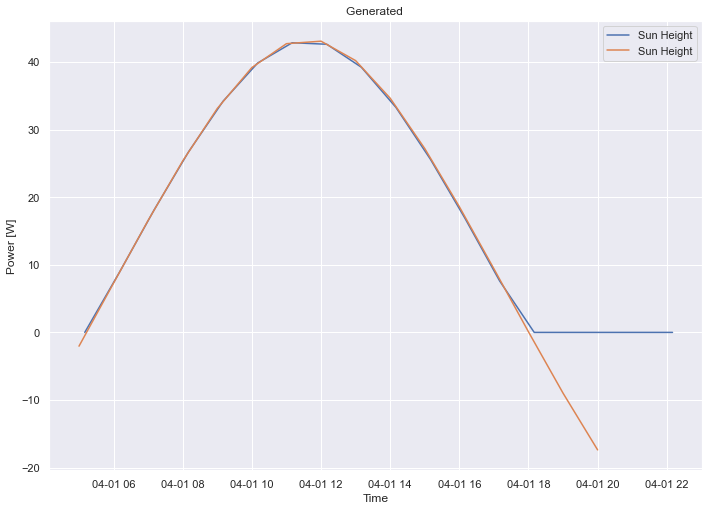

In [87]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlabel("Time") 
ax.set_ylabel("Power [W]")
ax.set_title("Generated ")
sns.lineplot(x="time", y="H_sun", data=mydata, label="Sun Height", ax=ax)
sns.lineplot(x=forecast_data.index, y="ELEVATION", data=forecast_data, label="Sun Height", ax=ax)

<AxesSubplot:title={'center':'Generated '}, xlabel='Time', ylabel='Power [W]'>

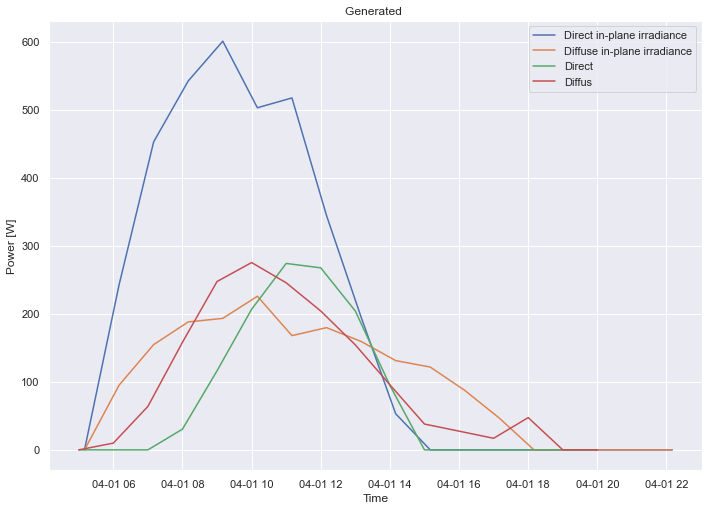

In [89]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlabel("Time") 
ax.set_ylabel("Power [W]")
ax.set_title("Generated ")
sns.lineplot(x="time", y="Gb(i)", data=mydata, label="Direct in-plane irradiance", ax=ax)
sns.lineplot(x="time", y="Gd(i)", data=mydata, label="Diffuse in-plane irradiance", ax=ax)
sns.lineplot(x="DATE", y="Ost_total_irrad_poa_direct", data=forecast_data, label="Direct", ax=ax)
sns.lineplot(x="DATE", y="Ost_total_irrad_poa_diffuse", data=forecast_data, label="Diffus", ax=ax)
